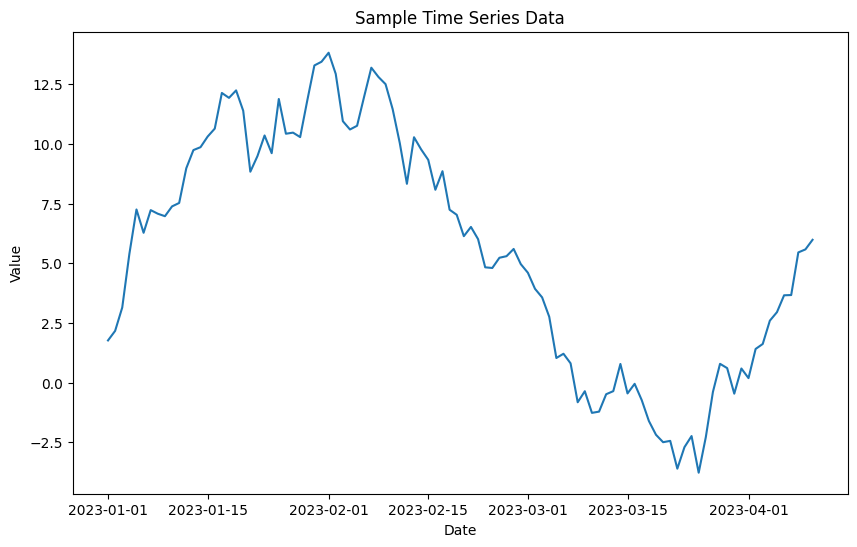

ADF Statistic: -1.1320384625097901
p-value: 0.7021277385898382
데이터는 정상성을 가지지 않습니다. 차분이 필요할 수 있습니다.
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -139.082
Date:                Fri, 01 Nov 2024   AIC                            284.163
Time:                        17:13:47   BIC                            291.949
Sample:                    01-01-2023   HQIC                           287.313
                         - 04-10-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9450      0.082     11.493      0.000       0.784       1.106
ma.L1         -0.8819      0.115

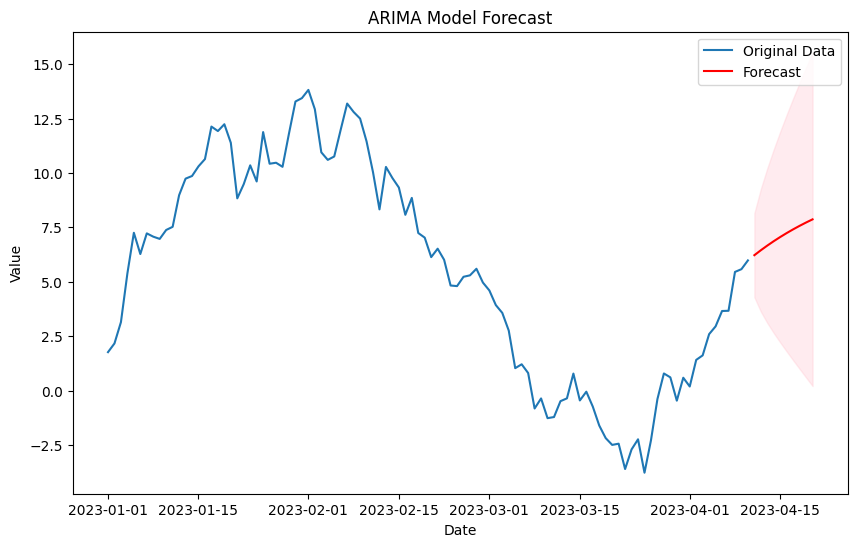

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# 예제 시계열 데이터 생성
np.random.seed(0)
data = np.cumsum(np.random.randn(100))  # 랜덤한 누적 합 데이터 생성
time_series = pd.Series(data, index=pd.date_range("2023-01-01", periods=100))

# 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(time_series)
plt.title("Sample Time Series Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

# 데이터가 정상성을 가지는지 확인 (ADF 테스트)
adf_result = adfuller(time_series)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
if adf_result[1] < 0.05:
    print("데이터는 정상성을 가집니다.")
else:
    print("데이터는 정상성을 가지지 않습니다. 차분이 필요할 수 있습니다.")

# ARIMA 모델 학습 (차수 설정은 예시로 p=1, d=1, q=1)
model = ARIMA(time_series, order=(1, 1, 1))
arima_result = model.fit()

# 모델 요약 출력
print(arima_result.summary())

# 미래 데이터 예측
forecast = arima_result.get_forecast(steps=10)  # 10 스텝 예측
forecast_index = pd.date_range(time_series.index[-1] + pd.Timedelta(days=1), periods=10)
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# 예측 시각화
plt.figure(figsize=(10, 6))
plt.plot(time_series, label="Original Data")
plt.plot(forecast_series, label="Forecast", color="red")
plt.fill_between(forecast_index, 
                 forecast.conf_int().iloc[:, 0], 
                 forecast.conf_int().iloc[:, 1], color="pink", alpha=0.3)
plt.title("ARIMA Model Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()
